# Benchmarks

## Initialize

In [61]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

In [93]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

##### BEGIN ADAPT #####
# second best model
# wandb_name = 'aug++_convnext_s_mlp'
# wandb_id = '8ngm6apd'
# best model
wandb_name = 'aug++_convnext_s_mlp+'
wandb_id = '3p3smraz'
partitions = list(0) # list(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)
##### END   ADAPT #####

experiment = wandb_id
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [94]:
base_size = 8
title_size = 10
facet_size = 10
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [95]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Age+Sex" = colors_dict$pastel$red$mid,
    "Retina" = colors_dict$pastel$red$mid,
    "Age+Sex+Retina" = colors_dict$pastel$red$mid,
    'MultiTaskSurvivalTraining_None_InceptionResnetV2+MLP_Identity' = colors_dict$pastel$red$mid
    #"Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    #"Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    #"GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [96]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [97]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order_freq = (outcome_freq %>% arrange(desc(freq)))$endpoint

In [98]:
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [99]:
endpoint_selection = c(
    "phecode_008",
    "phecode_092-2",
    "phecode_105",
    "phecode_107-2",
    "phecode_164",
    "phecode_202-2",
    "phecode_284",
    "phecode_328",
    "phecode_371",
    "phecode_404",
    "phecode_424",
    "phecode_440-11",
    "phecode_468",
    "phecode_474",
    "phecode_522-1",
    "phecode_542-1",
    "phecode_581-1",
    "phecode_583",
    "phecode_705-1",
    "OMOP_4306655"
    )

## Load data

# Load Benchmarks

In [100]:
name = "hrs_endpoints"
hrs_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather"), col_select=c("endpoint", "score", "partition", "hrs_ret", "hrs_ret_age", "hrs_ret_sex")) %>% left_join(endpoint_defs) 

Joining, by = "endpoint"



In [101]:
hrs_endpoints

endpoint,score,partition,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<glue>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
OMOP_4306655,Age+Sex+Retina,0,1.8309286,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,Retina,0,2.5298663,NA,NA,4306655,All-Cause Death,Death,Both,NA,NA,NA
phecode_052,Age+Sex+Retina,0,1.0253353,NA,NA,052,Herpesvirus,ID,Both,0,052,0
phecode_052,Retina,0,1.0804432,NA,NA,052,Herpesvirus,ID,Both,0,052,0
phecode_052-1,Age+Sex+Retina,0,0.9469142,NA,NA,052.1,Herpes simplex,ID,Both,0,052,1
phecode_052-1,Retina,0,0.8015654,NA,NA,052.1,Herpes simplex,ID,Both,0,052,1
phecode_052-3,Age+Sex+Retina,0,1.0233151,NA,NA,052.3,Varicella zoster virus,ID,Both,0,052,0
phecode_052-3,Retina,0,1.0765202,NA,NA,052.3,Varicella zoster virus,ID,Both,0,052,0
phecode_052-32,Age+Sex+Retina,0,1.0862158,NA,NA,052.32,Herpes zoster,ID,Both,0,052,1


In [102]:
hrs = hrs_endpoints %>% 
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    #filter(score %in% c("Retina", "Age+Sex+Retina", "Age+Sex+Retina+I(Age*ret)")) %>%
    #mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    #mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    select(endpoint, score, hrs_ret, hrs_ret_age, hrs_ret_sex, phecode_string, phecode_category) %>%
    ungroup()
hrs

endpoint,score,hrs_ret,hrs_ret_age,hrs_ret_sex,phecode_string,phecode_category
<glue>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
OMOP_4306655,Age+Sex+Retina,1.8309286,NA,NA,All-Cause Death,Death
OMOP_4306655,Retina,2.5298663,NA,NA,All-Cause Death,Death
phecode_052,Age+Sex+Retina,1.0253353,NA,NA,Herpesvirus,ID
phecode_052,Retina,1.0804432,NA,NA,Herpesvirus,ID
phecode_052-1,Age+Sex+Retina,0.9469142,NA,NA,Herpes simplex,ID
phecode_052-1,Retina,0.8015654,NA,NA,Herpes simplex,ID
phecode_052-3,Age+Sex+Retina,1.0233151,NA,NA,Varicella zoster virus,ID
phecode_052-3,Retina,1.0765202,NA,NA,Varicella zoster virus,ID
phecode_052-32,Age+Sex+Retina,1.0862158,NA,NA,Herpes zoster,ID


In [103]:
unique(hrs$score)

[1] "Age+Sex+Retina" "Retina"

In [104]:
purrr::map_dfr(integer(100), ~ hrs %>% group_by(endpoint, score) %>% sample_frac(1, replace=TRUE), .id="i") -> temp_hrs

In [105]:
library(ggdist)

In [106]:
temp_hrs_ret = temp_hrs %>% group_by(endpoint, score, phecode_string, phecode_category) %>% median_qi(hrs_ret, hrs_ret_age, hrs_ret_sex, na.rm=TRUE)

In [107]:
temp_hrs_linear = temp_hrs %>% ungroup() %>%
    filter(score %in% c("Retina", "Age+Sex+Retina")) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>% 
    median_qi(`hrs_ret`, na.rm=TRUE) %>% rename(hr = `hrs_ret`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Retina = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, score, phecode_string, phecode_category, HR_Retina) %>%
    pivot_wider(names_from="score", values_from="HR_Retina") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
    #mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
    
temp_hrs_linear

phecode_category,endpoint,phecode_string,Retina,Age+Sex+Retina
<chr>,<fct>,<chr>,<glue>,<glue>
ID,phecode_052,Herpesvirus,"1.08 (1.08, 1.08)","1.03 (1.03, 1.03)"
ID,phecode_052-1,Herpes simplex,"0.8 (0.8, 0.8)","0.95 (0.95, 0.95)"
ID,phecode_052-3,Varicella zoster virus,"1.08 (1.08, 1.08)","1.02 (1.02, 1.02)"
ID,phecode_052-32,Herpes zoster,"1.12 (1.12, 1.12)","1.09 (1.09, 1.09)"
ID,phecode_056,Human papillomavirus,"0.99 (0.99, 0.99)","1.01 (1.01, 1.01)"
ID,phecode_056-1,Plantar wart,"0.96 (0.96, 0.96)","1.05 (1.05, 1.05)"
ID,phecode_070,Candidiasis,"1.41 (1.41, 1.41)","1.34 (1.34, 1.34)"
ID,phecode_089,Infections,"1.17 (1.17, 1.17)","1.17 (1.17, 1.17)"
ID,phecode_089-1,Bacterial infections,"1.28 (1.28, 1.28)","1.32 (1.32, 1.32)"


In [108]:
temp_hrs_linear %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category)

endpoint,phecode_string,Retina,Age+Sex+Retina
<fct>,<chr>,<glue>,<glue>
phecode_105,Malignant neoplasm of the breast,"1.61 (1.61, 1.61)","1.12 (1.12, 1.12)"
phecode_107-2,Malignant neoplasm of the prostate,"2.09 (2.09, 2.09)","1.3 (1.3, 1.3)"
phecode_164,Anemia,"1.57 (1.57, 1.57)","1.58 (1.58, 1.58)"
phecode_202-2,Type 2 diabetes,"1.27 (1.27, 1.27)","1.56 (1.56, 1.56)"
phecode_328,Dementias and cerebral degeneration,"1.59 (1.59, 1.59)","1.54 (1.54, 1.54)"
phecode_371,Cataract,"2.1 (2.1, 2.1)","1.62 (1.62, 1.62)"
phecode_404,Ischemic heart disease,"1.66 (1.66, 1.66)","1.52 (1.52, 1.52)"
phecode_424,Heart failure,"2.23 (2.23, 2.23)","1.84 (1.84, 1.84)"
phecode_440-11,Deep vein thrombosis [DVT],"0.83 (0.83, 0.83)","0.97 (0.97, 0.97)"


## Interactions

In [109]:
temp_int_age = temp_hrs %>% ungroup() %>% 
    filter(score %in% c("Age+Sex+Retina")) %>% 
    pivot_longer(all_of(c("hrs_ret")), names_to="variable", values_to="hr")
    #filter(variable == "hrs_ret_age")

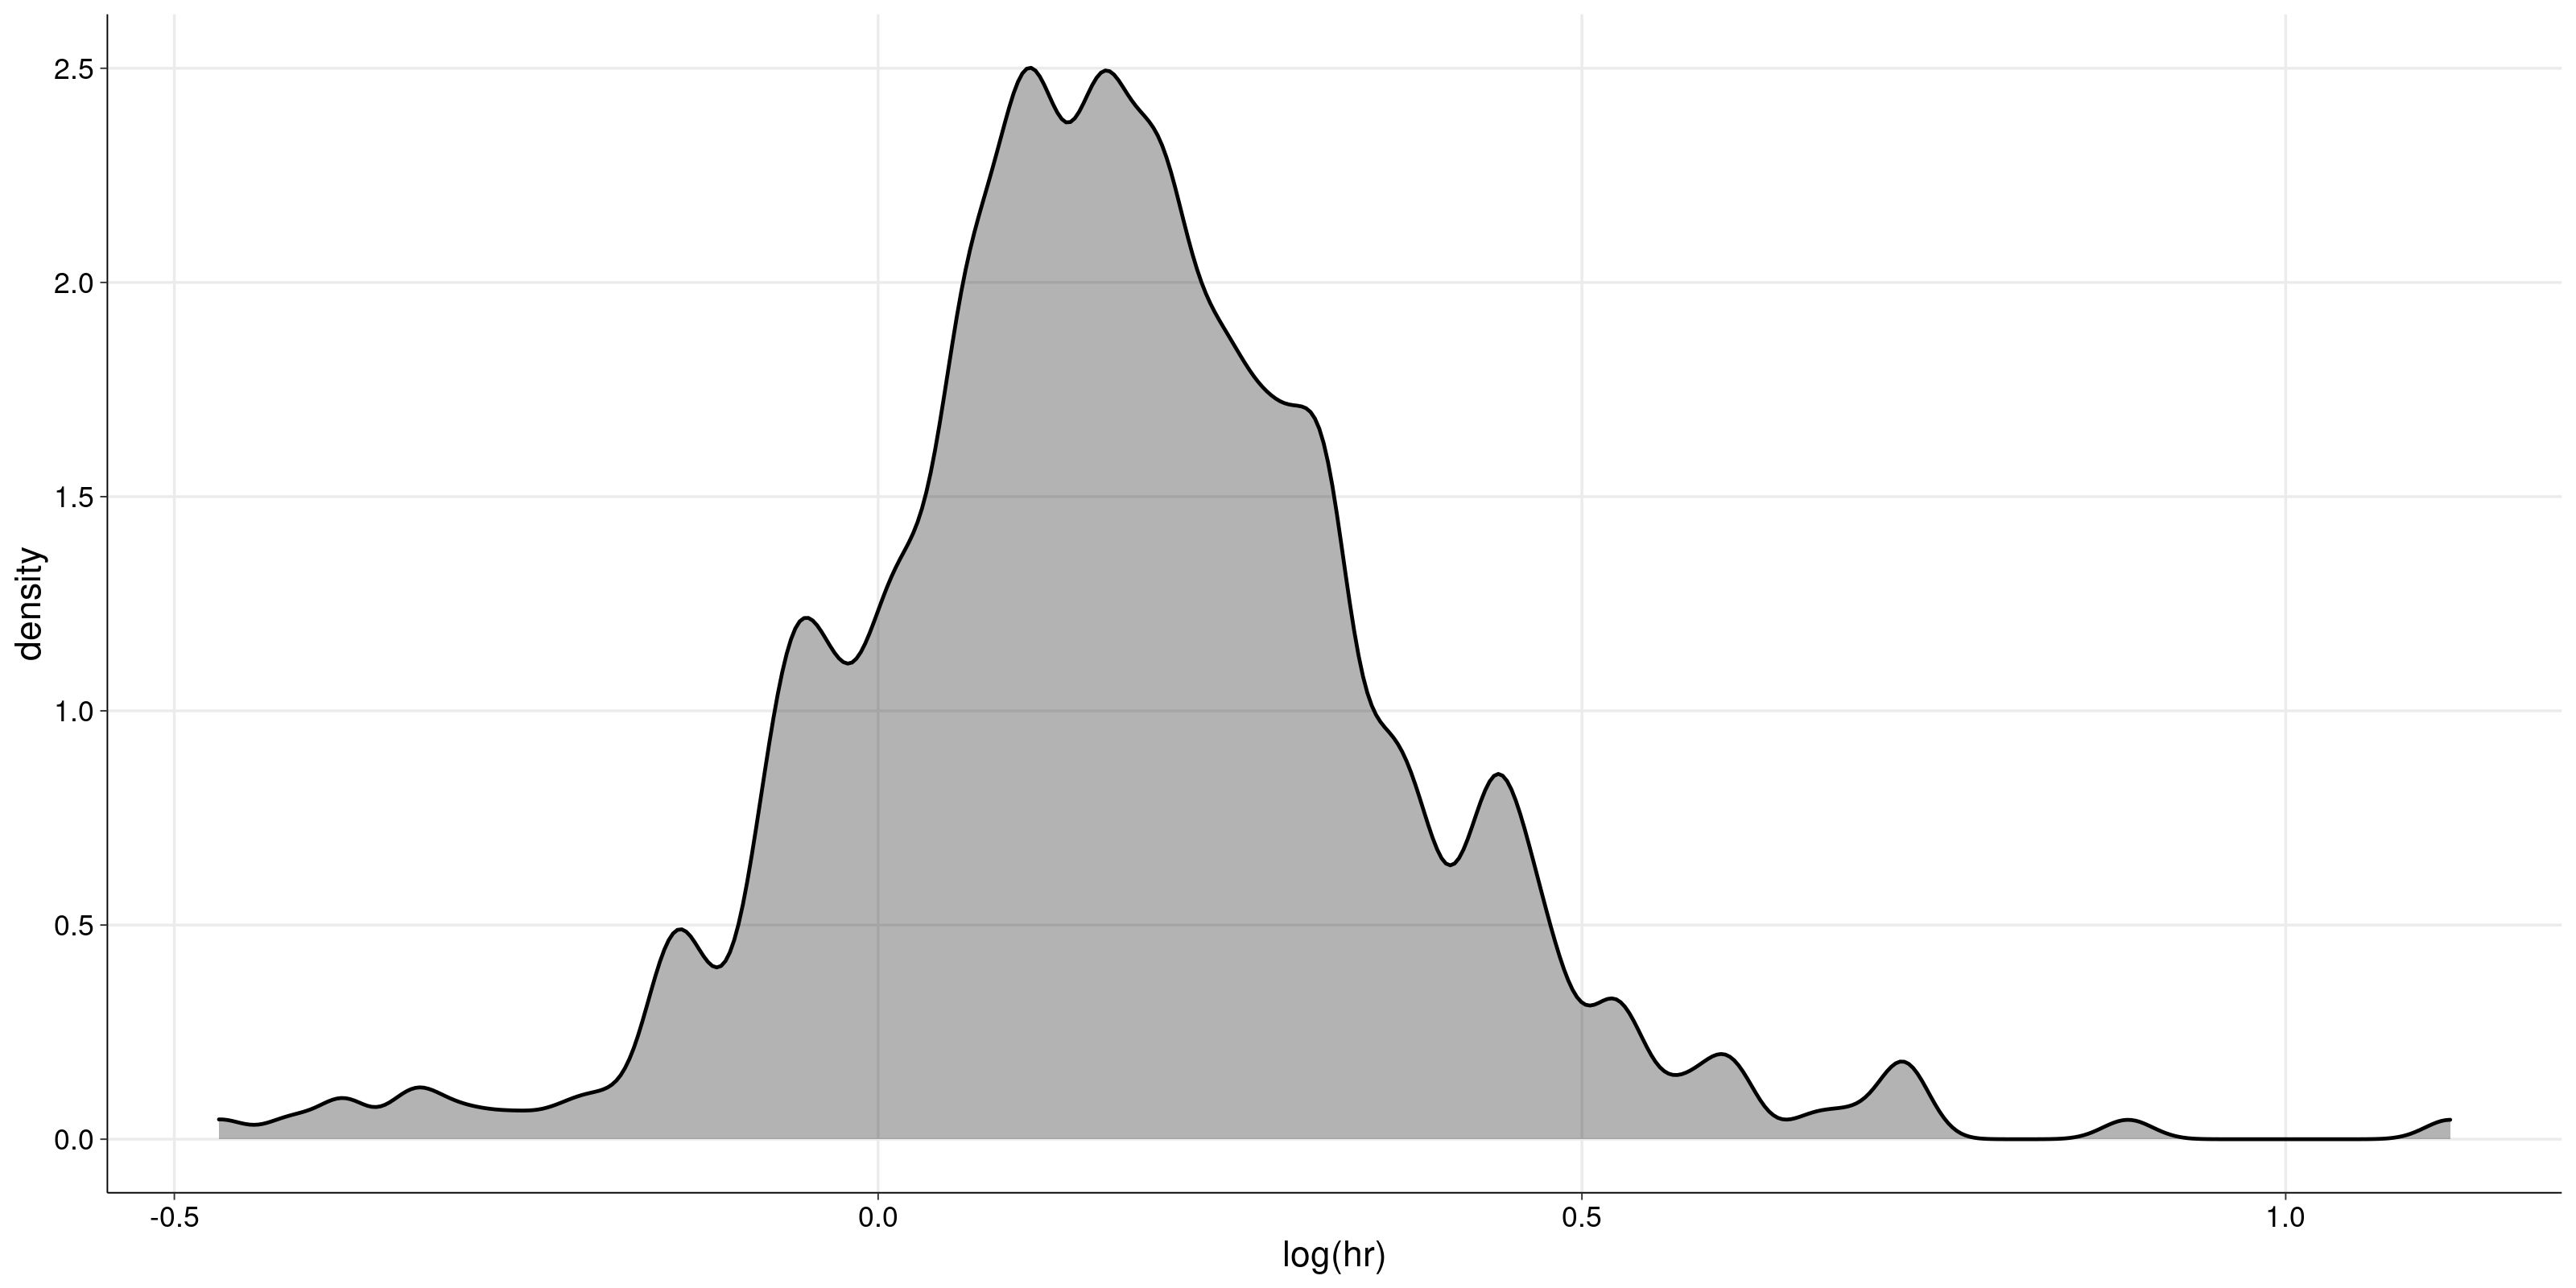

In [110]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_age, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [111]:
temp_int_sex= temp_hrs %>% ungroup() %>%
    filter(score %in% c("Age+Sex+Retina")) %>% # TODO: Age+Sex+Retina+I(Age*ret)
    pivot_longer(all_of(c("hrs_ret" )), names_to="variable", values_to="hr") #%>% # "hrs_ret_age", "hrs_ret_sex"
    #filter(variable == "hrs_ret_sex")

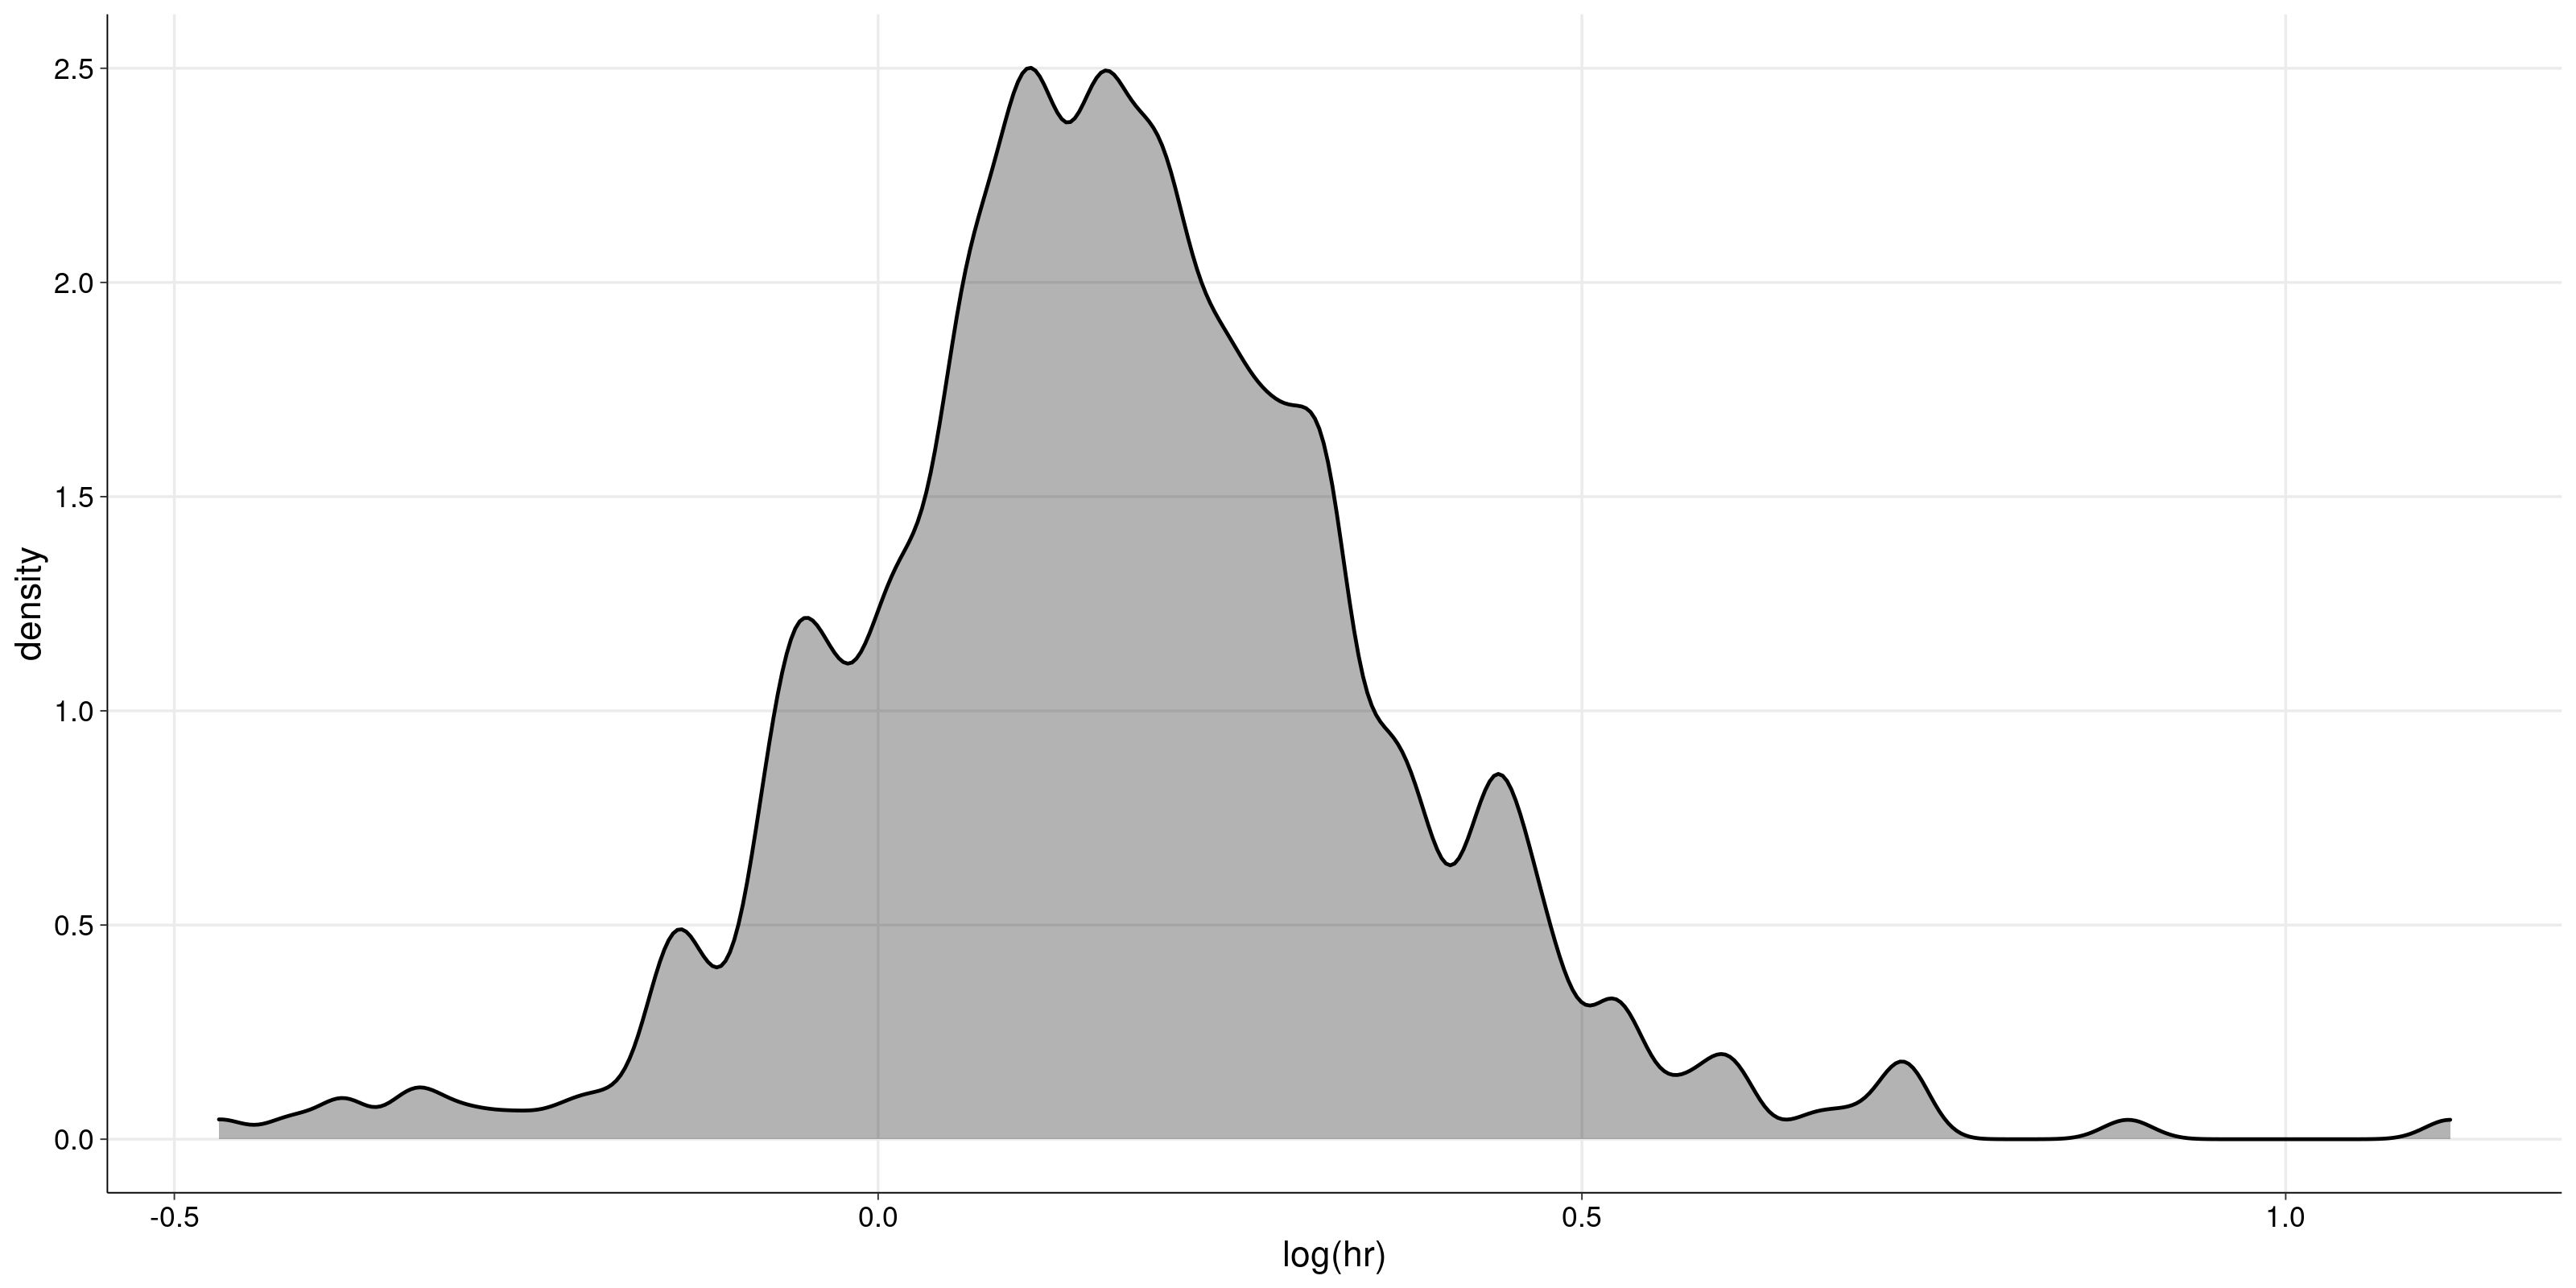

In [112]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

ggplot(temp_int_sex, aes(x=log(hr))) + geom_density(fill="black", alpha=0.3)

In [113]:
temp_hrs_int = temp_hrs %>% 
    filter(score %in% c("Age+Sex+Retina")) %>% # TODO: Age+Sex+Retina+I(Age*ret)
    pivot_longer(all_of(c("hrs_ret")), names_to="variable", values_to="hr") %>%
    group_by(endpoint, score, variable, phecode_string, phecode_category) %>% 
    median_qi(hr, na.rm=TRUE) %>% 
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_label = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, variable, phecode_string, phecode_category, HR_label) %>%
    pivot_wider(names_from="variable", values_from="HR_label") %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "hrs_ret"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(endpoint) %>%
#mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup() %>%
    rename(HR_Ret = hrs_ret)
    
#temp_hrs_int
temp_hrs_int %>% arrange(desc(`HR_Ret`))

phecode_category,endpoint,phecode_string,HR_Ret
<chr>,<fct>,<chr>,<glue>
Derm,phecode_686,Chronic ulcer of skin,"3.06 (3.06, 3.06)"
Eye,phecode_374-42,Diabetic retinopathy,"2.43 (2.43, 2.43)"
Blood,phecode_160-1,Iron deficiency anemia,"2.08 (2.08, 2.08)"
Rx,phecode_977-7,Long term (current) use of insulin or oral hypoglycemic drugs,"2.08 (2.08, 2.08)"
Blood,phecode_164-1,Microcytic anemia,"2.07 (2.07, 2.07)"
Genitourinary,phecode_625-1,Dyspareunia,"2.06 (2.06, 2.06)"
Cardio,phecode_404-11,Acute myocardial infarction,"1.99 (1.99, 1.99)"
Derm,phecode_686-2,Non-pressure chronic ulcer,"1.94 (1.94, 1.94)"
Cardio,phecode_424,Heart failure,"1.84 (1.84, 1.84)"


In [114]:
temp_hrs_int %>% filter(endpoint %in% endpoint_selection) %>% select(-phecode_category) #%>% 

endpoint,phecode_string,HR_Ret
<fct>,<chr>,<glue>
phecode_105,Malignant neoplasm of the breast,"1.12 (1.12, 1.12)"
phecode_107-2,Malignant neoplasm of the prostate,"1.3 (1.3, 1.3)"
phecode_164,Anemia,"1.58 (1.58, 1.58)"
phecode_202-2,Type 2 diabetes,"1.56 (1.56, 1.56)"
phecode_328,Dementias and cerebral degeneration,"1.54 (1.54, 1.54)"
phecode_371,Cataract,"1.62 (1.62, 1.62)"
phecode_404,Ischemic heart disease,"1.52 (1.52, 1.52)"
phecode_424,Heart failure,"1.84 (1.84, 1.84)"
phecode_440-11,Deep vein thrombosis [DVT],"0.97 (0.97, 0.97)"


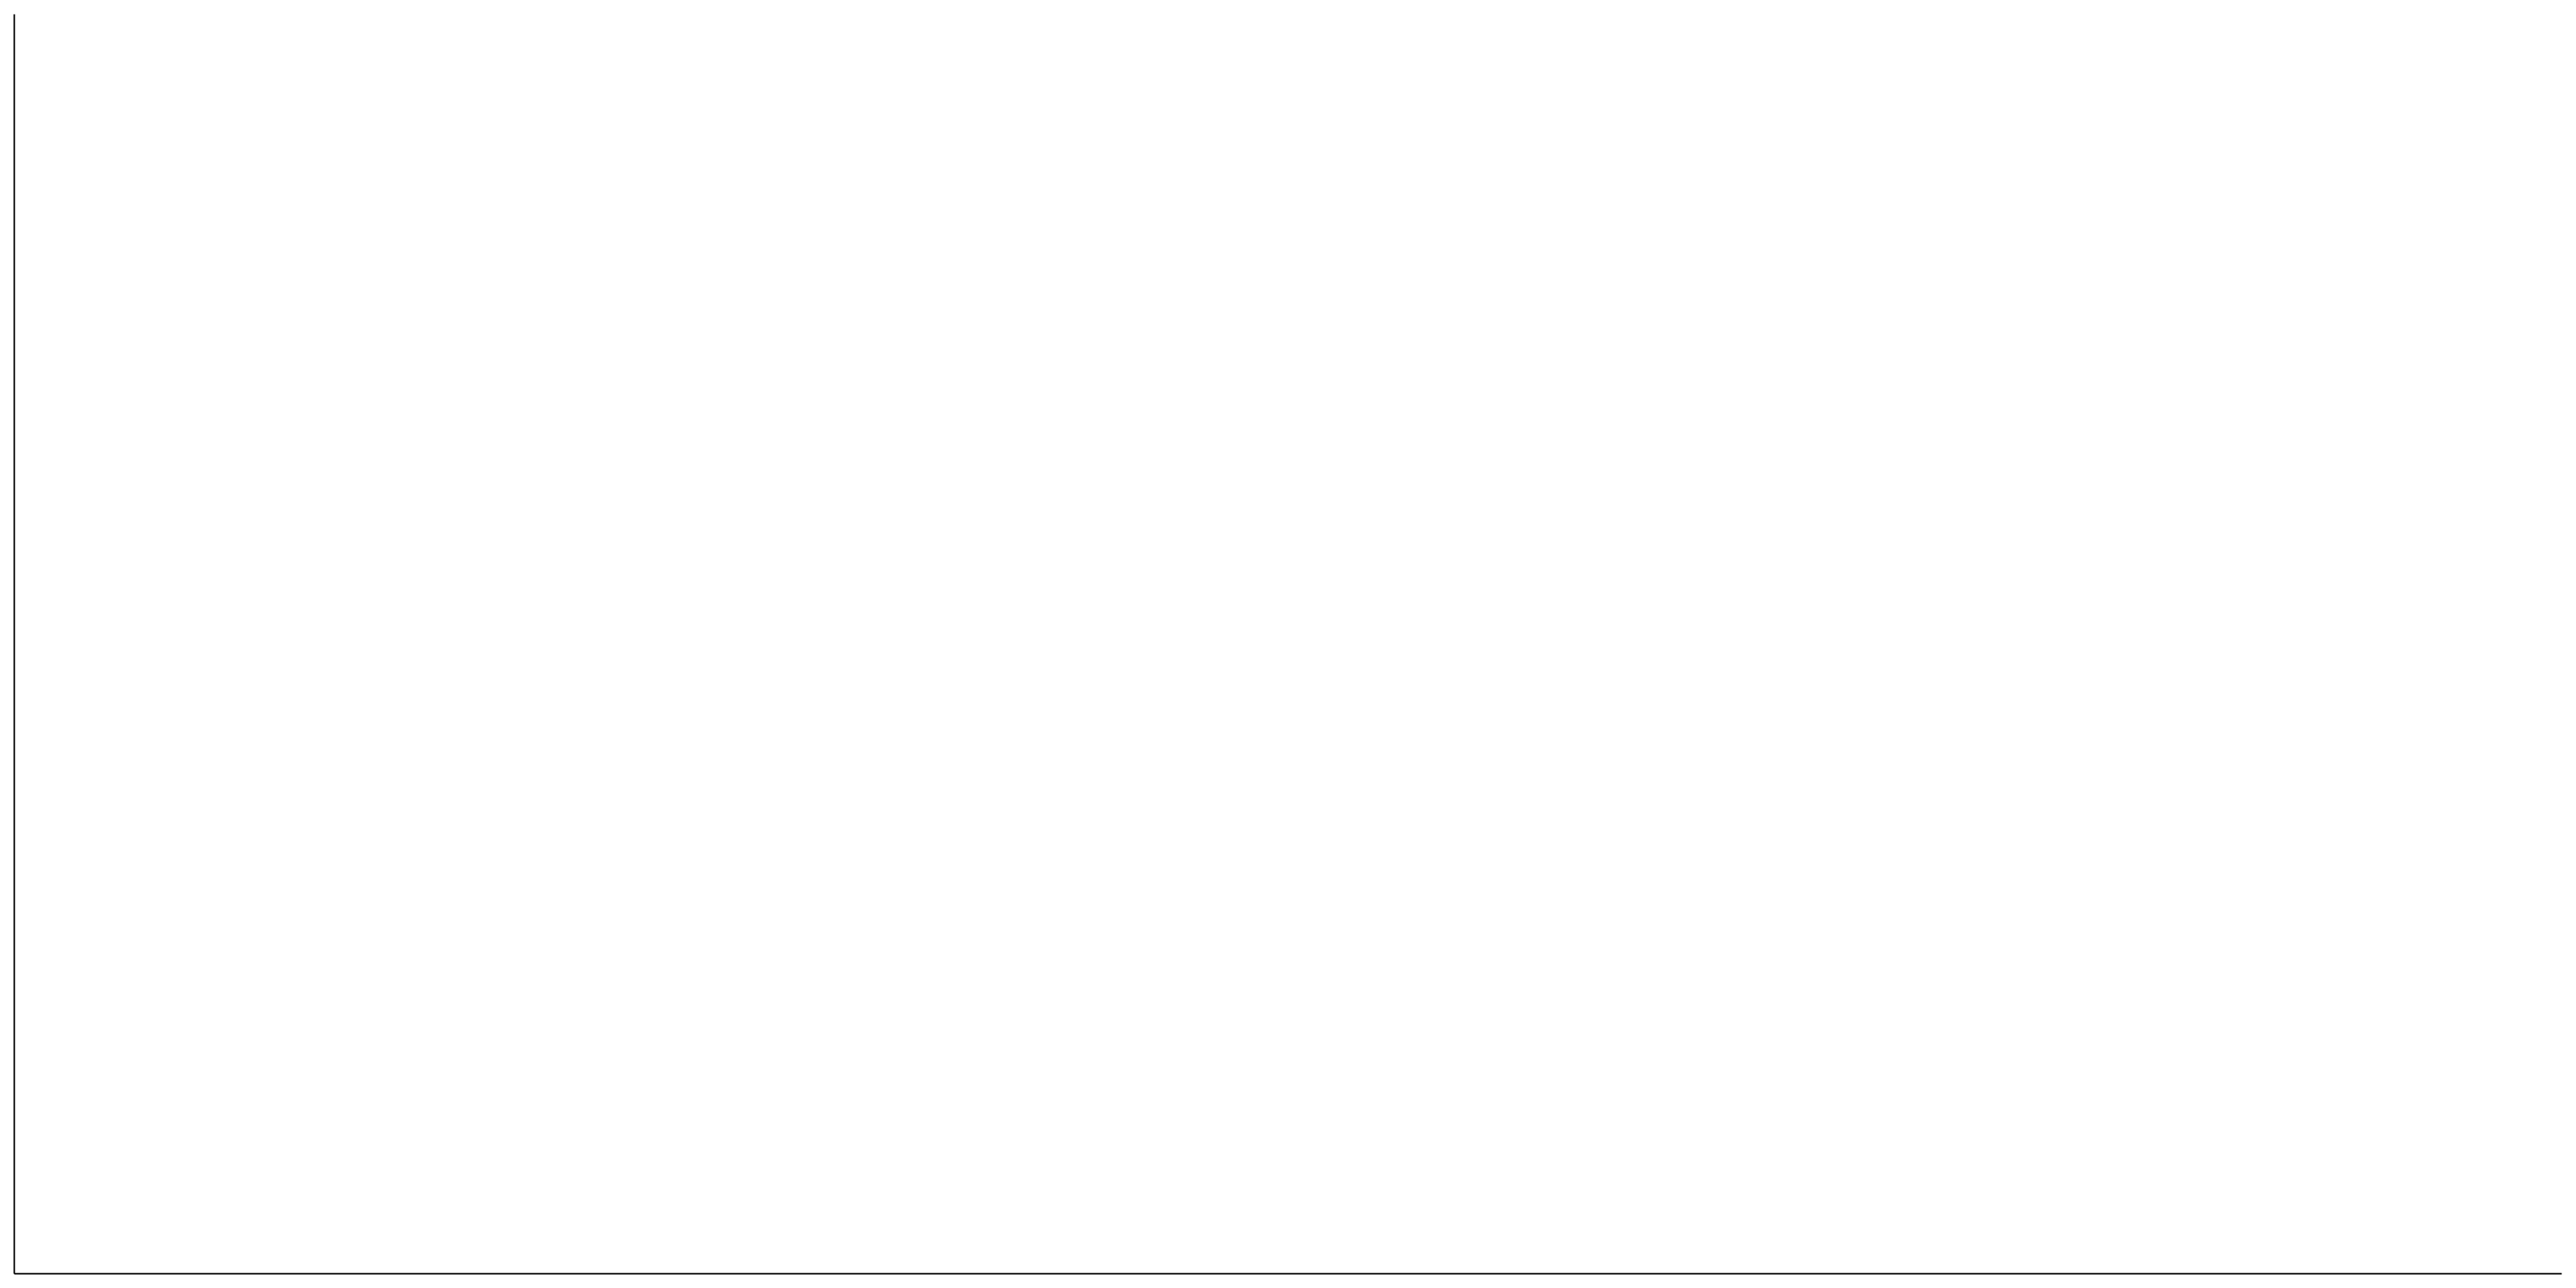

In [85]:
ggplot()

In [86]:
temp_hrs_agg  %>% 
    write_csv("outputs/SupplTable2_HRsAll.csv")

ERROR: Error in is.data.frame(x): object 'temp_hrs_agg' not found


In [87]:
select(all_of(c("phecode_category", "endpoint", "phecode_string", "Retina", 'Age+Sex+Retina'))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    arrange(phecode_category, endpoint) %>%
%>% filter(endpoint %in% endpoint_selection)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:1: unexpected SPECIAL
3:     arrange(phecode_category, endpoint) %>%
4: %>%
   ^


In [88]:
temp_hrs_agg

ERROR: Error in eval(expr, envir, enclos): object 'temp_hrs_agg' not found


In [89]:
temp_hrs_agg = temp_hrs %>% filter(endpoint %in% ep_sel) %>%
    group_by(endpoint, features) %>% median_qi(`exp(coef)`, na.rm=TRUE) %>% rename(hr = `exp(coef)`) %>%
    mutate(hr = round(hr, 2), .lower=round(.lower, 2), .upper=round(.upper, 2)) %>%#c(hr, .lower, .upper), round, 1) %>%
    mutate(HR_Metabolomics = glue("{hr} ({.lower}, {.upper})")) %>% 
    select(endpoint, features, HR_Metabolomics) %>%
    pivot_wider(names_from="features", values_from="HR_Retina") %>% 
    select(all_of(c("endpoint", 'Age+Sex+Retina',  # TODO
                    #'SCORE2+Retina', 
                    'ASCVD+Retina', 
                   "PANEL+Retina"))) %>% 
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% arrange(endpoint) %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    ungroup()
temp_hrs_agg

ERROR: Error: Problem with `filter()` input `..1`.
[34mℹ[39m Input `..1` is `endpoint %in% ep_sel`.
[31m✖[39m object 'ep_sel' not found
[34mℹ[39m The error occurred in group 1: endpoint = "OMOP_4306655", score = "Age+Sex+Retina".


In [90]:
fts_map = c(
    "Retina" = "RET",
    "COX_Age+Sex" = "AgeSex",
    "Age+Sex+Retina" = "AgeSex+RET",
    "COX_ASCVD" = "ASCVD",
    "ASCVD+Retina" = "ASCVD+RET",
    "COX_PANEL" = "PANEL", 
    "PANEL+Retina" = "PANEL+RET"
               )

In [91]:
hr_labels = temp_hrs_agg %>% 
    pivot_longer(-endpoint, names_to="features", values_to="HR")
hr_labels

ERROR: Error in pivot_longer(., -endpoint, names_to = "features", values_to = "HR"): object 'temp_hrs_agg' not found


In [92]:
temp_hr

ERROR: Error in eval(expr, envir, enclos): object 'temp_hr' not found


In [ ]:
endpoints_sorted = (temp_hr %>% filter(score == "Age+Sex+Retina") %>% arrange(endpoint))$endpoint

In [ ]:
pcats_sorted = (temp_hr %>% arrange(endpoint) %>% distinct(phecode_category))$phecode_category

In [ ]:
temp_hr %>% arrange(desc(hr)) %>% filter(endpoint %in% endpoint_selection)

In [26]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")+
    theme(strip.text.y = element_text(angle=0))#+ facet_wrap(~phecode_category, scales="free_x")

ERROR: Error in mutate(., endpoint = factor(endpoint, levels = endpoints_sorted)): object 'temp_hr' not found


In [27]:
plot_width = 10; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    filter(endpoint %in% endpoint_selection) %>%
    ggplot(aes(x=endpoint, y=hr, color=phecode_category)) + 
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=hr), color="black")+
    geom_point(size=1) + 
    geom_text(aes(y=hr+1, label=round(hr, 2)), size=2.5, hjust=-0)+
    geom_text(aes(y=hr+5, label=phecode_string), size=2.5, hjust=0)+
    coord_flip(ylim=c(0, 100)) + 
    facet_grid(rows=vars(phecode_category), scales="free_y", space="free_y")#+ facet_wrap(~phecode_category, scales="free_x")

ERROR: Error in mutate(., endpoint = factor(endpoint, levels = endpoints_sorted)): object 'temp_hr' not found


In [28]:
plot_width = 10; plot_height=10; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
temp_hr %>% 
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    mutate(phecode_category = factor(phecode_category, levels=pcats_sorted)) %>%
    ggplot(aes(x=hr)) + geom_density(bw=1) + coord_cartesian(xlim=c(0, 20))

ERROR: Error in mutate(., endpoint = factor(endpoint, levels = endpoints_sorted)): object 'temp_hr' not found


In [29]:
endpoint_sample = (benchmark_endpoints %>% select(endpoint) %>% distinct() %>% sample_n(20))$endpoint

ERROR: Error in select(., endpoint): object 'benchmark_endpoints' not found


In [30]:
plot_width = 10; plot_height=5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("AgeSex", "Retina", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% filter(score %in% scores_plot) %>% mutate(score = factor(score, levels=scores_plot)) %>% filter(endpoint %in% endpoint_sample)
temp %>% 
    ggplot(aes(x=score, y=cindex, fill=score, color=score)) + 
    geom_boxplot()+
    coord_flip()+
    #geom_violin(alpha=0.5) + 
    facet_wrap(~endpoint, labeller=labeller(endpoint=endpoint_map))

ERROR: Error in filter(., score %in% scores_plot): object 'benchmark_endpoints' not found


## Metabolic state and incident disease

In [31]:
pred_outcomes = predictions %>% left_join(data_outcomes, on=c(eid, endpoint)) %>% as.data.table() 

ERROR: Error in left_join(., data_outcomes, on = c(eid, endpoint)): object 'predictions' not found


In [32]:
logh_inc = pred_outcomes %>% filter(prevalent==0) %>% group_by(endpoint, model) %>% mutate(logh_perc = ntile(logh, 100)) %>% ungroup() %>% as_tibble()

ERROR: Error in filter(., prevalent == 0): object 'pred_outcomes' not found


## No buffer

In [33]:
logh_T_agg = logh_inc %>% group_by(endpoint, model, logh_perc) %>% summarise(ratio = mean(event)) %>% as_tibble()

ERROR: Error in group_by(., endpoint, model, logh_perc): object 'logh_inc' not found


In [34]:
logh_T_agg %>% write_feather(glue("{output_path}/logh_agg_220224.feather"))

ERROR: Error in write_feather(., glue("{output_path}/logh_agg_220224.feather")): object 'logh_T_agg' not found


In [35]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

ret_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Medical History Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

ERROR: Error in mutate(., phecode_rank = as.numeric(phecode)): object 'phecode_defs' not found


In [36]:
plot_name = "RetinaRisk"
ret_events %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

ERROR: Error in plot_theme(plot): object 'mh_events' not found


In [37]:
plot_name = "RetinaRisk"
ret_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

ERROR: Error in plot_theme(plot): object 'mh_events' not found


## Add buffer

In [38]:
pred_outcomes %>% head()

ERROR: Error in head(.): object 'pred_outcomes' not found


In [39]:
logh_T_agg_buffer = pred_outcomes %>% filter(prevalent==0) %>% mutate(event_buffer = case_when((event!=0&time<1) ~ 0, TRUE ~ event)) %>% group_by(endpoint, model) %>% mutate(logh_perc = ntile(logh, 100)) %>% group_by(endpoint, model, logh_perc) %>% summarise(ratio = mean(event_buffer)) %>% as_tibble()

ERROR: Error in filter(., prevalent == 0): object 'pred_outcomes' not found


In [16]:
logh_T_agg_buffer %>% write_feather(glue("{output_path}/logh_agg_1ybuffer_220224.feather"))

In [17]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg_buffer %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

ret_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Medical History Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [18]:
plot_name = "RetinaRisk_1ybuffer"
ret_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

## Metabolomic State and Event Trajectories

In [19]:
logh_ret = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(ret=case_when(logh_perc %in% 91:100 ~ "High", 
                        logh_perc %in% 45:55 ~ "Mid", 
                        logh_perc %in% 1:10 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(MET, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(ret!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [23]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_ret %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=MET, color=MET,group=MET)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "Retina_KMs"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Top 1%

In [26]:
logh_ret = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(ret=case_when(logh_perc == 100 ~ "High", 
                        logh_perc %in% 50:51 ~ "Mid", 
                        logh_perc == 1 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(ret, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(ret!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [27]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
ret_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_ret %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=ret, color=ret,group=ret)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=ret_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [28]:
plot_name = "Retina_KMs_Top1"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Figure 2

In [ ]:
plot_width=8.25; plot_height=10; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)
fig2 = met_events / km_plot# +plot_annotation(tag_levels = 'A')

In [ ]:
fig2

In [ ]:
library(gt)
plot_name = "Figures_2_AB"
fig2 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=320)